# Lab 1: Handwritten Digits Recognition

## Problem definition


We will provide a model to recognize handwritten digits.

## Data Preparation


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense

Loading the dataset

In [13]:
# downloading MNIST dataset
(x_train, y_train) , (x_test, y_test)= datasets.mnist.load_data() 

In [6]:
# print the size of the dataset
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape  )

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Snapshot of the dataset


In [7]:
import matplotlib.pyplot as plt

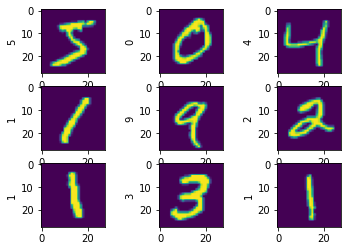

In [8]:
# show the first 9 images 
plt.figure()
for i in range(9):
  # creation of a figure containing 9 subplots
  plt.subplot(3,3,i+1)
  # show an image
  plt.imshow(x_train[i])
  # show the label
  plt.ylabel(y_train[i])
plt.show()

In [9]:
# print the first image
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Data Normalization

In [16]:
# reshaping the dataset
x_train_1 = x_train.reshape(60000,784)
x_test_1 = x_test.reshape(10000,784)

In [17]:
# pixel normalization
x_train_1 = x_train_1.astype('float32')/255
x_test_1 = x_test_1.astype('float32')/255

In [18]:
# showing the first normqlized picture
print(x_train_1[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [19]:
# shape of the x_train_1 and x_test_1
print(x_train_1.shape)
print(x_test_1.shape)

(60000, 784)
(10000, 784)


## DNN Construction

In [21]:
model = Sequential()
# input layer
model.add(Dense(512,input_dim=784))
model.add(Activation('relu'))
# first hidden layer
model.add(Dense(256))
model.add(Activation('relu'))
# 2nd hidden layer
model.add(Dense(128))
model.add(Activation('relu'))
# 3rd hidden layer
model.add(Dense(64))
model.add(Activation('relu'))
# 4th hidden layer
model.add(Dense(64))
model.add(Activation('relu'))
# Output layer
model.add(Dense(10))
# map the score of each class into probability
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])



In [22]:
# summary of my model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

## Training the model

In [24]:
# choose the best model to save
from tensorflow.keras.callbacks import ModelCheckpoint
model_name='DNN_model.h5'
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)


In [26]:
# train
model.fit(x_train_1, y_train, batch_size=128,epochs=3, callbacks=[model_checkpoint], verbose=1)

Epoch 1/3
468/469 [============================>.] - ETA: 0s - loss: 0.2588 - accuracy: 0.9224
Epoch 1: loss improved from inf to 0.25850, saving model to DNN_model.h5
469/469 [==============================] - 8s 14ms/step - loss: 0.2585 - accuracy: 0.9225
Epoch 2/3
468/469 [============================>.] - ETA: 0s - loss: 0.0953 - accuracy: 0.9712
Epoch 2: loss improved from 0.25850 to 0.09514, saving model to DNN_model.h5
469/469 [==============================] - 6s 13ms/step - loss: 0.0951 - accuracy: 0.9712
Epoch 3/3
466/469 [============================>.] - ETA: 0s - loss: 0.0640 - accuracy: 0.9797
Epoch 3: loss improved from 0.09514 to 0.06397, saving model to DNN_model.h5
469/469 [==============================] - 6s 13ms/step - loss: 0.0640 - accuracy: 0.9797


## Testing the model

In [28]:
new_model = Sequential()
# input layer
new_model.add(Dense(512,input_dim=784))
new_model.add(Activation('relu'))
# first hidden layer
new_model.add(Dense(256))
new_model.add(Activation('relu'))
# 2nd hidden layer
new_model.add(Dense(128))
new_model.add(Activation('relu'))
# 3rd hidden layer
new_model.add(Dense(64))
new_model.add(Activation('relu'))
# 4th hidden layer
new_model.add(Dense(64))
new_model.add(Activation('relu'))
# Output layer
new_model.add(Dense(10))
# map the score of each class into probability
new_model.add(Activation('softmax'))

new_model.compile(loss='sparse_categorical_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

new_model.load_weights('DNN_model.h5')
model.evaluate(x_test_1, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0826 - accuracy: 0.9752


[0.08256571739912033, 0.9751999974250793]